In [26]:
import sys
sys.path.insert(0,"E:\I I T M\R E S E A R C H\S C R I P T S\Fly-By-Data\main libraries") # folder which has main loading libs
import mavlab
import senlab
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [32]:
# log_filename = '2025-10-09 14-43-07.bin-1608525.mat'
log_filename = '2024-03-25 16-42-23.bin-792718.mat'
log_path = r'E:\I I T M\R E S E A R C H\S C R I P T S\Fly-By-Data\sample_mavlink'
params = ['AHR2','ATT','BARO_0','BAT_0','GPS_0','XKF1_0','RATE','RCOU']
log_filename  = '//'.join(log_path.split('\\')[:]) + '//' + log_filename

data = mavlab.data(log_filename,params)
time = mavlab.timedata_gpscor(log_filename,params)

Loading Data from Log File		: 100%|████████████████████████████████████████████████████████████
Loading Time Data from Log File		: 100%|████████████████████████████████████████████████████████████


In [33]:
# sen_filename = '2025_10_9_13_12_26_01.csv'
sen_filename = '2024_3_25_16_41_41.csv'
sen_path = r'E:\I I T M\R E S E A R C H\S C R I P T S\Fly-By-Data\sample_sensor'
sen_filename  = '//'.join(sen_path.split('\\')[:]) + '//' + sen_filename
sen_data = senlab.tsm_data_simple(sen_filename)
sen_data_inter = senlab.read_csv_interp(sen_filename,5,10)


Loading Data from Sensor File		: 100%|████████████████████████████████████████████████████████████


In [34]:
sen_time =  np.array(sen_data['Time Stamp'])

for i in range(len(sen_time)):
    sen_time[i] = datetime.datetime.strptime(sen_time[i], '%Y_%m_%d_%H_%M_%S') + datetime.timedelta(minutes= 91)

print(sen_time[0:5])
print(time['XKF1_0'][0:5])



[datetime.datetime(2024, 3, 25, 18, 12, 42)
 datetime.datetime(2024, 3, 25, 18, 12, 42)
 datetime.datetime(2024, 3, 25, 18, 12, 42)
 datetime.datetime(2024, 3, 25, 18, 12, 42)
 datetime.datetime(2024, 3, 25, 18, 12, 42)]
[datetime.datetime(2024, 3, 25, 16, 42, 41, 199091)
 datetime.datetime(2024, 3, 25, 16, 42, 41, 299094)
 datetime.datetime(2024, 3, 25, 16, 42, 41, 399128)
 datetime.datetime(2024, 3, 25, 16, 42, 41, 499152)
 datetime.datetime(2024, 3, 25, 16, 42, 41, 599148)]


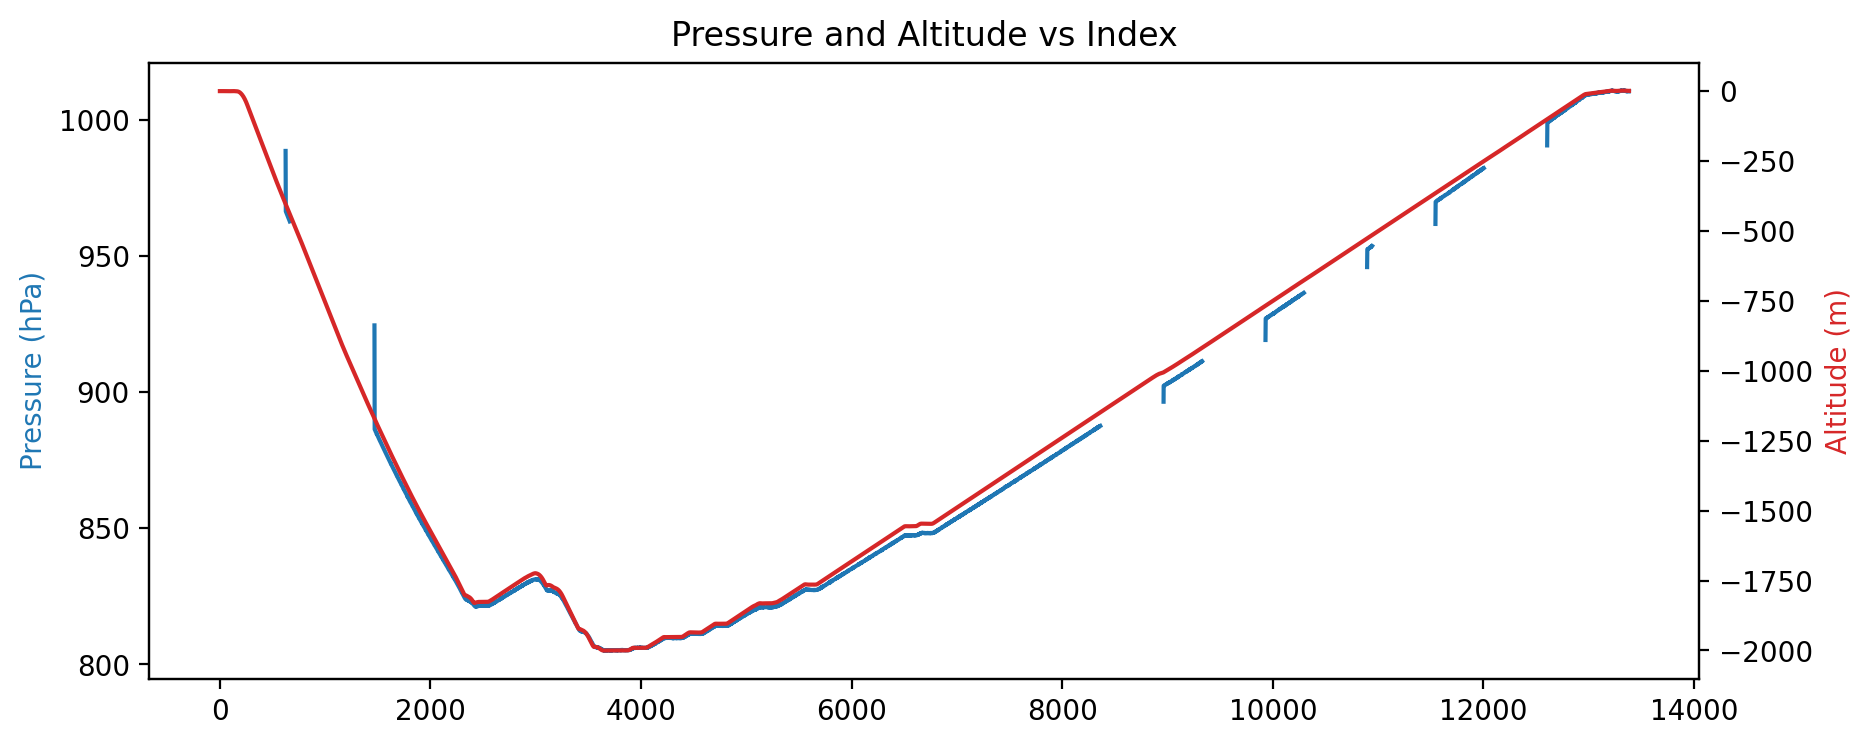

In [ ]:
pressure = np.array(sen_data['Absolute Pressure (TSM) (hPa)'])
alt = np.array(data['XKF1_0']['PD'])

n = 0
y = 0
x = len(alt) + n + y

pressure = np.array(pressure[n:x])
alt = np.array(alt[y:])

fig, ax1 = plt.subplots(figsize=(10,4),dpi=200)

ax1.plot(pressure, color='tab:blue')
ax1.set_ylabel('Pressure (hPa)', color='tab:blue')
# ax1.set_xlim(0,1000)

ax2 = ax1.twinx()
ax2.plot(alt, color='tab:red')
ax2.set_ylabel('Altitude (m)', color='tab:red')


plt.title("Pressure and Altitude vs Index")
plt.show()